In [1]:
import smooth_component_analysis as sca
from importlib import reload
reload(sca)
import numpy as np
import pandas as pd
import get_db_data as gdd

from scipy.stats import zscore


In [2]:
import seaborn as sns

In [3]:
sago = sca.savitzky_golay([1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051],21,11,2,3)

In [4]:
df = sago.get_aligned_signal_componets()

x range: 4.0 222.0


In [5]:
df.columns = pd.MultiIndex.from_tuples(df.columns)
df.columns

MultiIndex([(1042,   'Raw_227'),
            (1042,    'Sg_227'),
            (1042, 'resid_227'),
            (1042,   'rms_227'),
            (1042,  'rmso_227'),
            (1042,   'Raw_228'),
            (1042,    'Sg_228'),
            (1042, 'resid_228'),
            (1042,   'rms_228'),
            (1042,  'rmso_228'),
            ...
            (1051,   'Raw_255'),
            (1051,    'Sg_255'),
            (1051, 'resid_255'),
            (1051,   'rms_255'),
            (1051,  'rmso_255'),
            (1051,   'Raw_256'),
            (1051,    'Sg_256'),
            (1051, 'resid_256'),
            (1051,   'rms_256'),
            (1051,  'rmso_256')],
           length=150)

In [8]:
cdf = df.corr()

In [9]:
cdf.loc[(1042,   'Raw_227'),(1042,   'Raw_227')]

1.0

In [10]:

def yield_rmso_crossgroup_corr(same_group=False, col_type="rmso_",yield_with_colnames = False):
    cols = [c for c in cdf.columns if c[1].startswith(col_type)]
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            if (cols[i][0] == cols[j][0])==same_group: # different groups
                print(cols[i], cols[j])
                if yield_with_colnames:
                    yield ((cols[i], cols[j]), cdf.loc[cols[i],cols[j]])
                else:
                    yield cdf.loc[cols[i],cols[j]]

In [11]:
rm_cg = list(yield_rmso_crossgroup_corr())

(1042, 'rmso_227') (1043, 'rmso_230')
(1042, 'rmso_227') (1043, 'rmso_231')
(1042, 'rmso_227') (1043, 'rmso_232')
(1042, 'rmso_227') (1044, 'rmso_233')
(1042, 'rmso_227') (1044, 'rmso_234')
(1042, 'rmso_227') (1044, 'rmso_235')
(1042, 'rmso_227') (1045, 'rmso_236')
(1042, 'rmso_227') (1045, 'rmso_237')
(1042, 'rmso_227') (1045, 'rmso_238')
(1042, 'rmso_227') (1046, 'rmso_239')
(1042, 'rmso_227') (1046, 'rmso_240')
(1042, 'rmso_227') (1046, 'rmso_241')
(1042, 'rmso_227') (1047, 'rmso_242')
(1042, 'rmso_227') (1047, 'rmso_243')
(1042, 'rmso_227') (1047, 'rmso_244')
(1042, 'rmso_227') (1048, 'rmso_245')
(1042, 'rmso_227') (1048, 'rmso_246')
(1042, 'rmso_227') (1048, 'rmso_247')
(1042, 'rmso_227') (1049, 'rmso_248')
(1042, 'rmso_227') (1049, 'rmso_249')
(1042, 'rmso_227') (1049, 'rmso_250')
(1042, 'rmso_227') (1050, 'rmso_251')
(1042, 'rmso_227') (1050, 'rmso_252')
(1042, 'rmso_227') (1050, 'rmso_253')
(1042, 'rmso_227') (1051, 'rmso_254')
(1042, 'rmso_227') (1051, 'rmso_255')
(1042, 'rmso

In [12]:
rm_same = list(yield_rmso_crossgroup_corr(True))

(1042, 'rmso_227') (1042, 'rmso_228')
(1042, 'rmso_227') (1042, 'rmso_229')
(1042, 'rmso_228') (1042, 'rmso_229')
(1043, 'rmso_230') (1043, 'rmso_231')
(1043, 'rmso_230') (1043, 'rmso_232')
(1043, 'rmso_231') (1043, 'rmso_232')
(1044, 'rmso_233') (1044, 'rmso_234')
(1044, 'rmso_233') (1044, 'rmso_235')
(1044, 'rmso_234') (1044, 'rmso_235')
(1045, 'rmso_236') (1045, 'rmso_237')
(1045, 'rmso_236') (1045, 'rmso_238')
(1045, 'rmso_237') (1045, 'rmso_238')
(1046, 'rmso_239') (1046, 'rmso_240')
(1046, 'rmso_239') (1046, 'rmso_241')
(1046, 'rmso_240') (1046, 'rmso_241')
(1047, 'rmso_242') (1047, 'rmso_243')
(1047, 'rmso_242') (1047, 'rmso_244')
(1047, 'rmso_243') (1047, 'rmso_244')
(1048, 'rmso_245') (1048, 'rmso_246')
(1048, 'rmso_245') (1048, 'rmso_247')
(1048, 'rmso_246') (1048, 'rmso_247')
(1049, 'rmso_248') (1049, 'rmso_249')
(1049, 'rmso_248') (1049, 'rmso_250')
(1049, 'rmso_249') (1049, 'rmso_250')
(1050, 'rmso_251') (1050, 'rmso_252')
(1050, 'rmso_251') (1050, 'rmso_253')
(1050, 'rmso

In [53]:
sns.set()

RMS-O cross-group corr: 0.039 ± 0.19
RMS-O within-group corr:
      0.197 ± 0.19


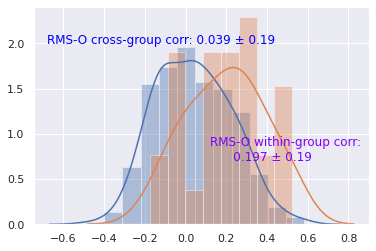

In [54]:
sns.distplot(rm_cg, bins=12)
sns.distplot(rm_same,bins=8)
stats = lambda v: (np.array(v).mean(), np.array(v).std())
str1 = "RMS-O cross-group corr: {:.3f} \u00b1 {:.2f}".format(*stats(rm_cg)) 
str2 = "RMS-O within-group corr:\n      {:.3f} \u00b1 {:.2f}".format(*stats(rm_same))
plt.text(-0.68,2., str1,color=(0,0,1))
plt.text(0.12,0.7, str2,color=(0.5,0,1))
print(str1)
print(str2)

In [14]:
rm1_cg = list(yield_rmso_crossgroup_corr(False,"rms_"))
rm1_same = list(yield_rmso_crossgroup_corr(True,"rms_"))

(1042, 'rms_227') (1043, 'rms_230')
(1042, 'rms_227') (1043, 'rms_231')
(1042, 'rms_227') (1043, 'rms_232')
(1042, 'rms_227') (1044, 'rms_233')
(1042, 'rms_227') (1044, 'rms_234')
(1042, 'rms_227') (1044, 'rms_235')
(1042, 'rms_227') (1045, 'rms_236')
(1042, 'rms_227') (1045, 'rms_237')
(1042, 'rms_227') (1045, 'rms_238')
(1042, 'rms_227') (1046, 'rms_239')
(1042, 'rms_227') (1046, 'rms_240')
(1042, 'rms_227') (1046, 'rms_241')
(1042, 'rms_227') (1047, 'rms_242')
(1042, 'rms_227') (1047, 'rms_243')
(1042, 'rms_227') (1047, 'rms_244')
(1042, 'rms_227') (1048, 'rms_245')
(1042, 'rms_227') (1048, 'rms_246')
(1042, 'rms_227') (1048, 'rms_247')
(1042, 'rms_227') (1049, 'rms_248')
(1042, 'rms_227') (1049, 'rms_249')
(1042, 'rms_227') (1049, 'rms_250')
(1042, 'rms_227') (1050, 'rms_251')
(1042, 'rms_227') (1050, 'rms_252')
(1042, 'rms_227') (1050, 'rms_253')
(1042, 'rms_227') (1051, 'rms_254')
(1042, 'rms_227') (1051, 'rms_255')
(1042, 'rms_227') (1051, 'rms_256')
(1042, 'rms_228') (1043, 'rm

<AxesSubplot:>

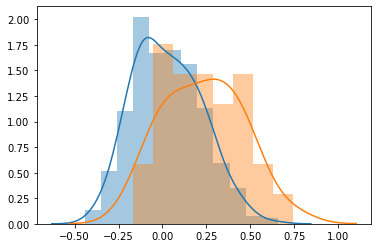

In [15]:
sns.distplot(rm1_cg, bins=12)
sns.distplot(rm1_same,bins=8)

In [16]:
import matplotlib.pyplot as plt

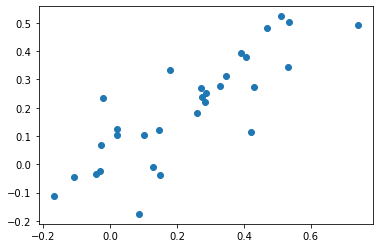

In [17]:
plt.scatter(rm1_same, rm_same)

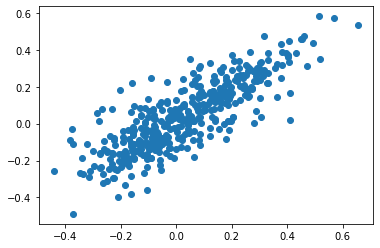

In [18]:
plt.scatter(rm1_cg, rm_cg)

In [19]:
sum((x-y)**2 for x, y in zip(rm1_cg,rm_cg))

5.2673667223409915

In [20]:
high_rmso = [(cols, corr) for (cols,corr) in yield_rmso_crossgroup_corr(same_group=True,yield_with_colnames=True) if corr > 0.4]

(1042, 'rmso_227') (1042, 'rmso_228')
(1042, 'rmso_227') (1042, 'rmso_229')
(1042, 'rmso_228') (1042, 'rmso_229')
(1043, 'rmso_230') (1043, 'rmso_231')
(1043, 'rmso_230') (1043, 'rmso_232')
(1043, 'rmso_231') (1043, 'rmso_232')
(1044, 'rmso_233') (1044, 'rmso_234')
(1044, 'rmso_233') (1044, 'rmso_235')
(1044, 'rmso_234') (1044, 'rmso_235')
(1045, 'rmso_236') (1045, 'rmso_237')
(1045, 'rmso_236') (1045, 'rmso_238')
(1045, 'rmso_237') (1045, 'rmso_238')
(1046, 'rmso_239') (1046, 'rmso_240')
(1046, 'rmso_239') (1046, 'rmso_241')
(1046, 'rmso_240') (1046, 'rmso_241')
(1047, 'rmso_242') (1047, 'rmso_243')
(1047, 'rmso_242') (1047, 'rmso_244')
(1047, 'rmso_243') (1047, 'rmso_244')
(1048, 'rmso_245') (1048, 'rmso_246')
(1048, 'rmso_245') (1048, 'rmso_247')
(1048, 'rmso_246') (1048, 'rmso_247')
(1049, 'rmso_248') (1049, 'rmso_249')
(1049, 'rmso_248') (1049, 'rmso_250')
(1049, 'rmso_249') (1049, 'rmso_250')
(1050, 'rmso_251') (1050, 'rmso_252')
(1050, 'rmso_251') (1050, 'rmso_253')
(1050, 'rmso

In [21]:
high_rmso

[(((1044, 'rmso_233'), (1044, 'rmso_234')), 0.4811868152442672),
 (((1044, 'rmso_233'), (1044, 'rmso_235')), 0.4909875744422092),
 (((1046, 'rmso_239'), (1046, 'rmso_241')), 0.5234297533677237),
 (((1051, 'rmso_254'), (1051, 'rmso_255')), 0.5037512812146371)]

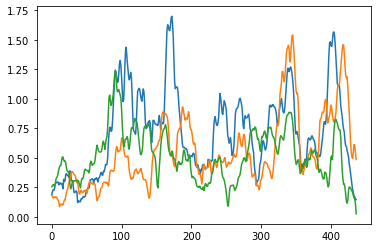

In [22]:
plt.plot(df[(1044, 'rmso_233')])
plt.plot(df[(1044, 'rmso_234')])
plt.plot(df[(1044, 'rmso_235')])

In [24]:
print(cdf.loc[(1044, 'Sg_233'),(1044, 'Sg_234')])
print(cdf.loc[(1044, 'Sg_233'),(1044, 'Sg_235')])
print(cdf.loc[(1044, 'Sg_234'),(1044, 'Sg_235')])


0.1102034588236227
0.24782280253600975
0.20210307976782022


In [25]:
resid_sg = list(yield_rmso_crossgroup_corr(same_group=True,yield_with_colnames=False,col_type='resid_'))
resid_cg = list(yield_rmso_crossgroup_corr(same_group=False,yield_with_colnames=False,col_type='resid_'))

(1042, 'resid_227') (1042, 'resid_228')
(1042, 'resid_227') (1042, 'resid_229')
(1042, 'resid_228') (1042, 'resid_229')
(1043, 'resid_230') (1043, 'resid_231')
(1043, 'resid_230') (1043, 'resid_232')
(1043, 'resid_231') (1043, 'resid_232')
(1044, 'resid_233') (1044, 'resid_234')
(1044, 'resid_233') (1044, 'resid_235')
(1044, 'resid_234') (1044, 'resid_235')
(1045, 'resid_236') (1045, 'resid_237')
(1045, 'resid_236') (1045, 'resid_238')
(1045, 'resid_237') (1045, 'resid_238')
(1046, 'resid_239') (1046, 'resid_240')
(1046, 'resid_239') (1046, 'resid_241')
(1046, 'resid_240') (1046, 'resid_241')
(1047, 'resid_242') (1047, 'resid_243')
(1047, 'resid_242') (1047, 'resid_244')
(1047, 'resid_243') (1047, 'resid_244')
(1048, 'resid_245') (1048, 'resid_246')
(1048, 'resid_245') (1048, 'resid_247')
(1048, 'resid_246') (1048, 'resid_247')
(1049, 'resid_248') (1049, 'resid_249')
(1049, 'resid_248') (1049, 'resid_250')
(1049, 'resid_249') (1049, 'resid_250')
(1050, 'resid_251') (1050, 'resid_252')


In [26]:
resid_sg = np.array(resid_sg)
resid_cg = np.array(resid_cg)

Resid cross-group corr:
0.014 ± 0.11
Resid within-group corr:
      0.100 ± 0.12


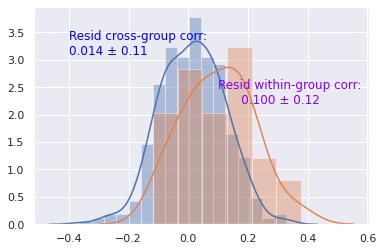

In [55]:
sns.distplot(resid_cg)

sns.distplot(resid_sg)

str1 = "Resid cross-group corr:\n{:.3f} \u00b1 {:.2f}".format(*stats(resid_cg)) 
str2 = "Resid within-group corr:\n      {:.3f} \u00b1 {:.2f}".format(*stats(resid_sg))
plt.text(-0.4,3.1, str1,color=(0,0,1))
plt.text(0.1,2.2, str2,color=(0.5,0,1))
print(str1)
print(str2)

In [56]:
from scipy.stats import ttest_ind

ttest_ind(resid_cg, resid_sg, equal_var=False)

Ttest_indResult(statistic=-3.8734995976090425, pvalue=0.00048661345389429167)

In [57]:
print("same group: {:.3f} \u00b1 {:.2f}".format(resid_sg.mean(), resid_sg.std()))
print("cross group: {:.3f} \u00b1 {:.2f}".format(resid_cg.mean(), resid_cg.std()))

same group: 0.100 ± 0.12
cross group: 0.014 ± 0.11


In [29]:
high_resid = [(cols, corr) for (cols,corr) in yield_rmso_crossgroup_corr(same_group=True,yield_with_colnames=True,col_type='resid_') if corr > 0.25]

(1042, 'resid_227') (1042, 'resid_228')
(1042, 'resid_227') (1042, 'resid_229')
(1042, 'resid_228') (1042, 'resid_229')
(1043, 'resid_230') (1043, 'resid_231')
(1043, 'resid_230') (1043, 'resid_232')
(1043, 'resid_231') (1043, 'resid_232')
(1044, 'resid_233') (1044, 'resid_234')
(1044, 'resid_233') (1044, 'resid_235')
(1044, 'resid_234') (1044, 'resid_235')
(1045, 'resid_236') (1045, 'resid_237')
(1045, 'resid_236') (1045, 'resid_238')
(1045, 'resid_237') (1045, 'resid_238')
(1046, 'resid_239') (1046, 'resid_240')
(1046, 'resid_239') (1046, 'resid_241')
(1046, 'resid_240') (1046, 'resid_241')
(1047, 'resid_242') (1047, 'resid_243')
(1047, 'resid_242') (1047, 'resid_244')
(1047, 'resid_243') (1047, 'resid_244')
(1048, 'resid_245') (1048, 'resid_246')
(1048, 'resid_245') (1048, 'resid_247')
(1048, 'resid_246') (1048, 'resid_247')
(1049, 'resid_248') (1049, 'resid_249')
(1049, 'resid_248') (1049, 'resid_250')
(1049, 'resid_249') (1049, 'resid_250')
(1050, 'resid_251') (1050, 'resid_252')


In [30]:

high_resid

[(((1044, 'resid_233'), (1044, 'resid_235')), 0.3769158448369974),
 (((1046, 'resid_239'), (1046, 'resid_241')), 0.3033121543988387)]

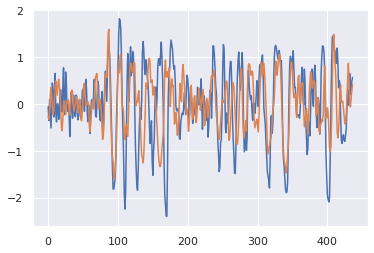

In [58]:
sns.set()
plt.plot(df[(1044, 'resid_233')])
plt.plot(df[(1044, 'resid_235')])

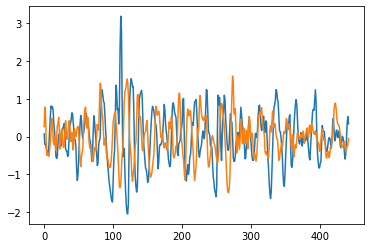

In [88]:
plt.plot(df[(1008, 'resid_122')])
plt.plot(df[(1010, 'resid_130')])

In [37]:
raw_same = list(yield_rmso_crossgroup_corr(True,"Raw_"))
sg_same = list(yield_rmso_crossgroup_corr(True,"Sg_")) 

(1042, 'Raw_227') (1042, 'Raw_228')
(1042, 'Raw_227') (1042, 'Raw_229')
(1042, 'Raw_228') (1042, 'Raw_229')
(1043, 'Raw_230') (1043, 'Raw_231')
(1043, 'Raw_230') (1043, 'Raw_232')
(1043, 'Raw_231') (1043, 'Raw_232')
(1044, 'Raw_233') (1044, 'Raw_234')
(1044, 'Raw_233') (1044, 'Raw_235')
(1044, 'Raw_234') (1044, 'Raw_235')
(1045, 'Raw_236') (1045, 'Raw_237')
(1045, 'Raw_236') (1045, 'Raw_238')
(1045, 'Raw_237') (1045, 'Raw_238')
(1046, 'Raw_239') (1046, 'Raw_240')
(1046, 'Raw_239') (1046, 'Raw_241')
(1046, 'Raw_240') (1046, 'Raw_241')
(1047, 'Raw_242') (1047, 'Raw_243')
(1047, 'Raw_242') (1047, 'Raw_244')
(1047, 'Raw_243') (1047, 'Raw_244')
(1048, 'Raw_245') (1048, 'Raw_246')
(1048, 'Raw_245') (1048, 'Raw_247')
(1048, 'Raw_246') (1048, 'Raw_247')
(1049, 'Raw_248') (1049, 'Raw_249')
(1049, 'Raw_248') (1049, 'Raw_250')
(1049, 'Raw_249') (1049, 'Raw_250')
(1050, 'Raw_251') (1050, 'Raw_252')
(1050, 'Raw_251') (1050, 'Raw_253')
(1050, 'Raw_252') (1050, 'Raw_253')
(1051, 'Raw_254') (1051, 'Ra

raw intra-group corr: 0.110 ± 0.17
sg intra-group corr: 0.132 ± 0.30


Text(-0.12, 1.0, 'SG intra-group corr: 0.132 ± 0.30')

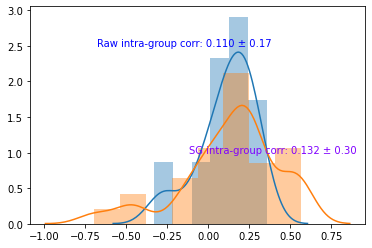

In [50]:
sns.distplot(raw_same)
sns.distplot(sg_same)

stats = lambda v: (np.array(v).mean(), np.array(v).std())
print("raw intra-group corr: {:.3f} \u00b1 {:.2f}".format(*stats(raw_same)))
print("sg intra-group corr: {:.3f} \u00b1 {:.2f}".format(*stats(sg_same)))

str1 = "Raw intra-group corr: {:.3f} \u00b1 {:.2f}".format(*stats(raw_same)) 
str2 = "SG intra-group corr: {:.3f} \u00b1 {:.2f}".format(*stats(sg_same))
plt.text(-0.68,2.5, str1,color=(0,0,1))
plt.text(-0.12,1., str2,color=(0.5,0,1))

In [ ]:
data = gdd.get_db_data()
test_pars = list(data.get_signal_by_series_type_and_interp_type([112,117],2,3))
test_pars

In [ ]:
plt.plot(test_pars[0][1][:,1])
plt.plot(test_pars[1][1][:,1])

In [ ]:
group_compts1004 = sago.group_signal_components(1004)
group_compts1006 = sago.group_signal_components(1006)

In [ ]:
plt.plot(zscore(test_pars[0][1][:,1]))
plt.plot(group_compts1004['Raw_112']+2)

plt.plot(group_compts1004['Sg_112']+group_compts1004['resid_112']+4)

plt.plot(df[(1004,'Raw_112')]+6)

In [ ]:
plt.plot(zscore(test_pars[1][1][:,1]))
plt.plot(group_compts1006['Raw_117']+2)

plt.plot(group_compts1006['Sg_117']+group_compts1006['resid_117']+4)

plt.plot(df[(1006,'Raw_117')]+6)

In [ ]:
plt.plot(zscore(test_pars[1][1][:,1]))
plt.plot(group_compts1006['rms_117']+2)

#plt.plot(group_compts1006['Sg_117']+group_compts1006['resid_117']+4)

plt.plot(df[(1006,'rms_117')]+6)

In [ ]:
np.corrcoef(df[(1006,'rms_117')], df[(1004,'rms_112')])

In [ ]:
rm_same = list(yield_rmso_crossgroup_corr(True))

In [ ]:
np.corrcoef(group_compts1004['rmso_112'],group_compts1006['rmso_117'])

In [ ]:
[len(x) for x in group_compts1004.values()]

In [ ]:
p1 = list(sca.yield_group_signals(1004,2,3))
p1

In [ ]:
dfc = df.corr()

In [ ]:
dfc.columns

In [ ]:
dfc[(1006,'rms_117')].index

In [ ]:
dfc.index